# О проекте

Меня пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, я проведу разведывательный анализ данных и составлю отчёт по его результатам.

Датасет представлен здесь:

In [1454]:
dataset_url='https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST_through+14OCT2019+type@asset+block/stud_math.csv'

## Описание датасета

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

## Загрузка данных

Импортируем необходимые для работы модули

In [1455]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

И загрузим данные

In [1456]:
orig_df = pd.read_csv(dataset_url, low_memory = False)

Проверим структуру датасета:

In [1457]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Видим, что в датасете есть все переменные, описанные в документации (см. "Описание датасета" выше). Но есть и недокументированная переменная "studytime, granular". Отметим для себя этот факт.

Сделаем копию датасета, чтобы при необходимости вернуться к оригиналу, это можно было сделать без обращения к Интернету (напомню, что загрузили мы датасет из Интернета по dataset_url)

In [1458]:
df = orig_df.copy()

Посмотрим на dataset глазами, чтобы убедиться, что не возникло проблем с кодировкой и т.п.

In [1459]:
pd.set_option('display.max_columns', df.shape[1]) # показывать больше колонок
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Беглый вгзляд на данные проблем с загрузкой данных не выявил.

## Предобработка данных

Разделим переменные на две группы: числовые и номинативные (категориальные):

In [1460]:
# числовые
q_flds = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
# номинативные
n_flds = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Проверим, что мы не пропустили ни одно поле, нигде не ошиблись в написаниии и не продублировали:

In [1461]:
df[ list(set(q_flds).union(set(n_flds))) ].shape[1] == df.shape[1] and len(q_flds) + len(n_flds) == df.shape[1]

True

## Вспомогательные функции

Для анализа значений переменных нам будут полезны следующие функции:

In [1462]:
# возвращает долю пропусков в колонке col датафрейма df в виде строки со значением в процентах
def spaces(df, col):
    n = len(df[pd.isna(df[col])])
    return f'Пропусков: {str(round(100 * n / df.shape[0], 1))}% ({n})'

# заменяет в датафрейма df те значения колонки col на специальное значение val, которые УДОВЛЕТВОРЯЮТ условию fn:
# fn - лямбда-функция одной переменной возвращающая булево значение
def set_val_if(df, col, val, fn):
    df[col] = df[col].apply(lambda x: val if fn(x) else x)
    
# рисует матрицу корреляции колонок cols датафрейма df
def plot_corr(df, cols, figsize=30, figscale=1.4, fmt='.2f'):
    sns.set(font_scale=figscale)
    plt.subplots(figsize=(figsize, figsize))
    sns.heatmap(df[cols].corr(), square=True, annot=True, fmt=fmt, linewidths=0.1, cmap="RdBu")
    
# рисует гистограмму распределения значений колонки col датафрейма df, используя параметр bins для .hist()
# по умолчанию, bins равен количеству уникальных значений колонки col
def plot_hist(df, col, bins=None):
    if bins is None:
        bins=df[col].value_counts().shape[0]
    df[col].hist(bins=bins)
    
# удаляет элемент fld из списка flds
def remove_fld_from(fld, flds):
    if fld in flds: flds.remove(fld)

## Анализ и предообработка числовых переменных

### age - возраст ученика (от 15 до 22)

Проверим уникальные значения этой переменной:

In [1463]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Все они находятся в предумотренном диапазоне от 15 до 22

Пропусков при этом нет:

In [1464]:
spaces(df, 'age')

'Пропусков: 0.0% (0)'

Посмотрим на гистограмму распределения значений:

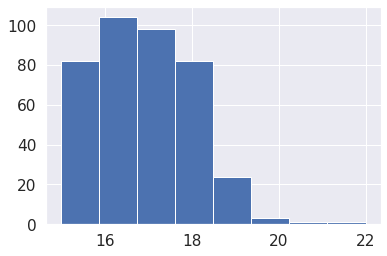

In [1465]:
plot_hist(df, 'age')

Видно, что значения смещены влево относительно центра диапазона "от 15 до 22", то есть в нашей выборке преимущественно молодые люди от 15 до 18.

Единичные значения "21" и "22" можно было бы считать выбросами, но они укладываются в предусмотренный задачей диапазон.

### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Проверим уникальные значения этой переменной:

In [1466]:
df.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Все они укладываются в предусмотренные диапазон от 0 до 4

При этом есть небольшое количество пропусков:

In [1467]:
spaces(df, 'Medu')

'Пропусков: 0.8% (3)'

Посмотрим на гистограмму распределения значений:

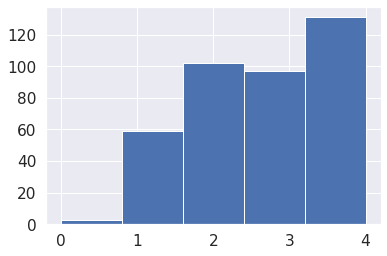

In [1468]:
plot_hist(df, 'Medu')

Видно, что значения тяготяют к правой границе диапазона, то есть матери наших учеников склонны быть образоваными

### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Проверим уникальные значения этой переменной:

In [1469]:
df.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Обнаружили значение "40", которое не укладывается в предусмотренный диапазон

Заменим его пропуском

In [1470]:
set_val_if(df, 'Fedu', None, lambda x: x > 4)

Выясним количество пропусков:

In [1471]:
spaces(df, 'Fedu')

'Пропусков: 6.3% (25)'

Обратим внимание, что здесь пропусков на порядок больше, чем у переменной Medu

Посмотрим на гистограмму распределения значений:

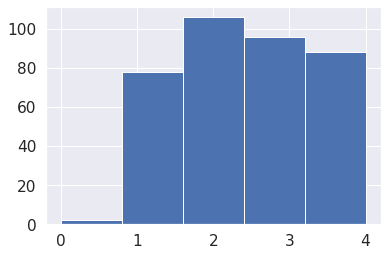

In [1472]:
plot_hist(df, 'Fedu')

В этом случае также превалируют образованные (пусть и относительно) над необразованными, хотя большинство имеют образование "5-9 классов", в отличие от "высшего" для Medu

Основываясь на здравом смысле (подобное тянется к подобному), выскажем предположение о том, что существует связь между уровнем образования матери и уровнем образования отца

Проверим эту гипотезу:

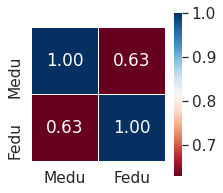

In [1473]:
plot_corr(df, ['Medu', 'Fedu'], figsize=3)

Коэффициент корреляции 0.63 достаточно значим, а с учетом того, что пропусков у переменной Fedu на порядок больше, чем у переменной Medu, я бы исключил переменную Fedu из дальнейшего рассмотрения, полагаясь только на уровень образования матери:

In [1474]:
remove_fld_from('Fedu', q_flds)

### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Проверим уникальные значения этой переменной:

In [1475]:
df.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Все они укладываются в предусмотренные диапазон от 1 до 4

При этом есть заметное количество пропусков:

In [1476]:
spaces(df, 'traveltime')

'Пропусков: 7.1% (28)'

Посмотрим на гистограмму распределения значений:

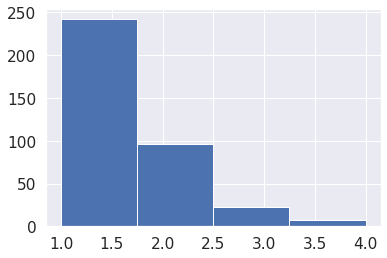

In [1477]:
plot_hist(df, 'traveltime')

Видим, что подавляющая часть учеников живет вблизи школы

Можно заменить пропуски на популярное значение "1":

In [1478]:
set_val_if(df, 'traveltime', 1, lambda x: pd.isna(x))
spaces(df, 'traveltime')

'Пропусков: 0.0% (0)'

### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Проверим уникальные значения этой переменной:

In [1479]:
df.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Все они укладываются в предусмотренные диапазон от 1 до 4

При этом есть некоторое количество пропусков:

In [1480]:
spaces(df, 'studytime')

'Пропусков: 1.8% (7)'

Посмотрим на гистограмму распределения значений:

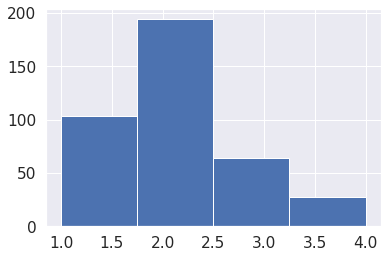

In [1481]:
plot_hist(df, 'studytime')

Распределение похоже на нормальное с центром в значении "2", то есть большинство тратит время на учебу помимо школы от 2 до 5 часов в неделю с отколонениями в меньшую и большую стороны

Можно заменить пропуски на популярное значение "2":

In [1482]:
set_val_if(df, 'studytime', 2, lambda x: pd.isna(x))
spaces(df, 'studytime')

'Пропусков: 0.0% (0)'

### failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

Проверим уникальные значения этой переменной:

In [1483]:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Все они укладываются в предусмотренные диапазон от 0 до 3

При этом есть заметное количество пропусков:

In [1484]:
spaces(df, 'failures')

'Пропусков: 5.6% (22)'

Посмотрим на гистограмму распределения значений:

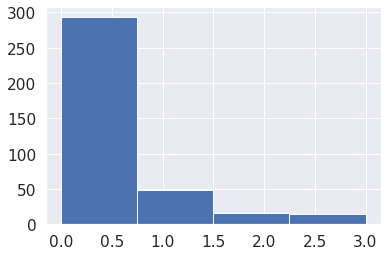

In [1485]:
plot_hist(df, 'failures')

Видим, что основная масса учеников с внеучебными неудачами (что бы это ни было) не сталкиваются

Думаю, что пропуски для этой переменной можно заменить на самое популярное значение "0"

In [1486]:
set_val_if(df, 'failures', 2, lambda x: pd.isna(x))
spaces(df, 'failures')

'Пропусков: 0.0% (0)'

### studytime, granular - недокументированная колонка

Проверим уникальные значения этой переменной:

In [1487]:
df['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

И пропуски:

In [1488]:
spaces(df, 'studytime, granular')

'Пропусков: 1.8% (7)'

Посмотрим на гистограмму распределения значений:

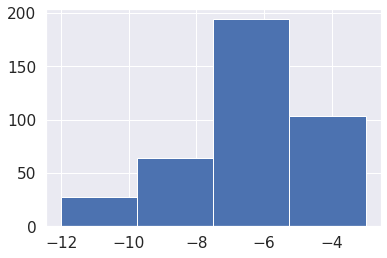

In [1489]:
plot_hist(df, 'studytime, granular')

Обратим внимание, что гистограмма распределения переменной `studytime, granular` зеркально симметрична гистограмме распределения колонки `studytime`

Можно предположить наличие корелляции между `studytime, granular` и `studytime`. 

Проверим гипотезу:

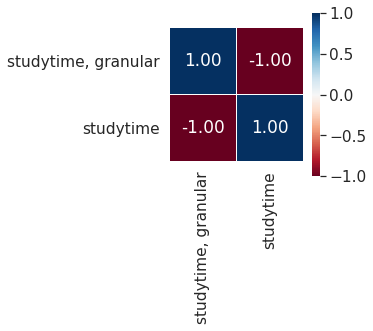

In [1490]:
plot_corr(df, ['studytime, granular', 'studytime'], figsize=3)

Да, связь 100%-ная. Можно исключить недокументированное поле `studytime, granular` из дальнейшего рассмотрения:

In [1491]:
remove_fld_from('studytime, granular', q_flds)

### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Проверим уникальные значения этой переменной:

In [1492]:
df.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Обнаружено значение `-1`, выходящее за пределы предусмотренного диапазона от `1` до `5`. 

Заменим его пропуском и проверим количество пропусков:

In [1493]:
set_val_if(df, 'famrel', None, lambda x: x < 1)
spaces(df, 'famrel')

'Пропусков: 7.1% (28)'

Посмотрим на гистограмму распределения значений:

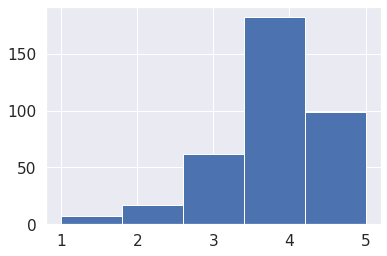

In [1494]:
plot_hist(df, 'famrel')

Распределение похоже на нормальное с центром в `4`, то есть у большинства учеников хорошие семейные отношения с некоторыми отклонениями в лучшую и худшую стороны

Пропуски можно заменить на популярное значение `4`:

In [1495]:
set_val_if(df, 'famrel', 4, lambda x: pd.isna(x))
spaces(df, 'famrel')

'Пропусков: 0.0% (0)'

### freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)

Проверим уникальные значения этой переменной:

In [1496]:
df.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Все они укладываются в предусмотренные диапазон от 1 до 5

При этом есть некоторое количество пропусков:

In [1497]:
spaces(df, 'freetime')

'Пропусков: 2.8% (11)'

Посмотрим на гистограмму распределения значений:

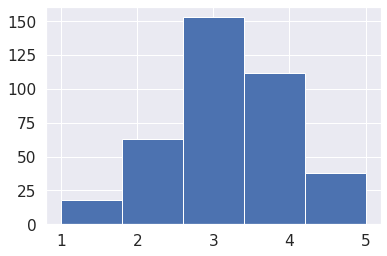

In [1498]:
plot_hist(df, 'freetime')

Распределение похоже на нормальное с центром в `3`, то есть у большинства учеников есть свободное время с некоторыми отклонениями в ту (мало) и другую (много) стороны

Пропуски можно заменить на популярное значение `3`:

In [1499]:
set_val_if(df, 'freetime', 3, lambda x: pd.isna(x))
spaces(df, 'freetime')

'Пропусков: 0.0% (0)'

### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Проверим уникальные значения этой переменной:

In [1500]:
df.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Все они укладываются в предусмотренные диапазон от 1 до 5

При этом есть некоторое количество пропусков:

In [1501]:
spaces(df, 'goout')

'Пропусков: 2.0% (8)'

Посмотрим на гистограмму распределения значений:

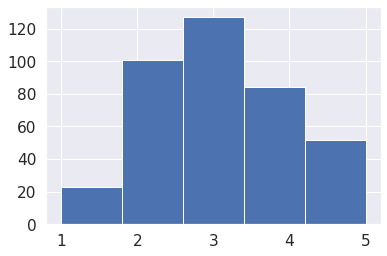

In [1502]:
plot_hist(df, 'goout')

Распределение похоже на нормальное с центром в `3`, то есть большинства учеников достаточно времени проводит с друзьями с некоторыми отклонениями в ту (мало) и другую (много) стороны

Пропуски можно заменить на популярное значение `3`:

In [1503]:
set_val_if(df, 'goout', 3, lambda x: pd.isna(x))
spaces(df, 'goout')

'Пропусков: 0.0% (0)'

### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Проверим уникальные значения этой переменной:

In [1504]:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Все они укладываются в предусмотренные диапазон от 1 до 5

При этом есть некоторое количество пропусков:

In [1505]:
spaces(df, 'health')

'Пропусков: 3.8% (15)'

Посмотрим на гистограмму распределения значений:

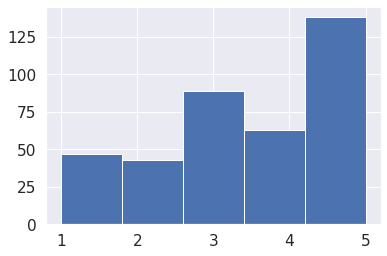

In [1506]:
plot_hist(df, 'health')

Здесь не наблюдается ни нормального распределения, ни подавляющего значения. Пропуски я бы заменять не стал ни чем

### absences — количество пропущенных занятий

Проверим уникальные значения этой переменной:

In [1507]:
df.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Посмотрим на гистограмму распределения значений:

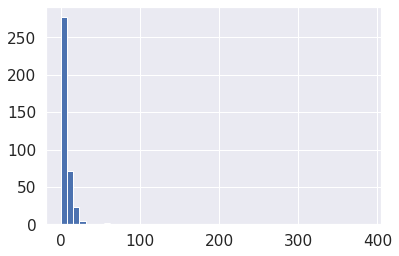

In [1508]:
plot_hist(df, 'absences', bins=50)

Видно, что основная масса значений находится в младших десятках первой сотни. 

Попробуем определить границу отсечения следующим образом:

Выберем максимальное значение переменной `absences` присутствующее в выборке более одного раза:

In [1509]:
vc = df.absences.value_counts()
treshold = sorted(list(vc[vc >= 2].index.values), reverse=True)[0]
treshold

22.0

И определим удаленность этого значения от 3-го квартиля в межквартильных интервалах:

In [1510]:
quartile_1 = df.absences.quantile(0.25)
quartile_3 = df.absences.quantile(0.75)
iqr = quartile_3 - quartile_1
print(f'quartile_3: {quartile_3}, iqr: {iqr}, dist: {round((treshold - quartile_3) / iqr, 1)}')

quartile_3: 8.0, iqr: 8.0, dist: 1.8


Найденное нами значение `22` повторяется в выборке более одного раза, поэтому я бы не стал его игнорировать

В то же время оно отстоит от третего квартиля на расстоянии почти двух межквартильных интервалов, то есть достаточно далеко, чтобы значения больше `22` считать выбросами

Заменим выбросы пропусками и проверим количество пропусков:

In [1511]:
set_val_if(df, 'absences', None, lambda x: x > treshold)
spaces(df, 'absences')

'Пропусков: 6.3% (25)'

Посмотрим на гистограмму распределения значений:

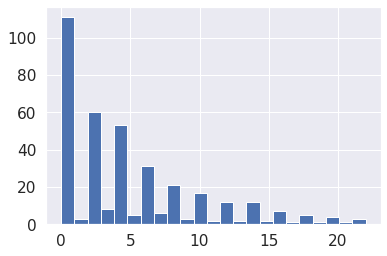

In [1512]:
plot_hist(df, 'absences')

Видно, что большинство имеет нулевое количество пропущенных занятий, но это не подавляющее большинство

### score — баллы по госэкзамену по математике

Проверим уникальные значения этой переменной:

In [1513]:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

На первый взгляд, все значения находятся в диапазоне от `0` до `100`, что похоже на диапазон баллов. 

Но немного смущают нулевые значения баллов

Посмотрим на гистограмму распределения значений:

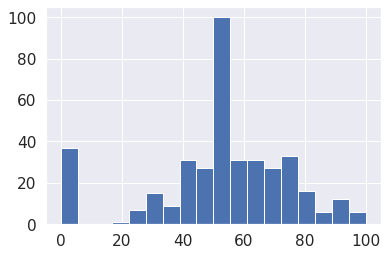

In [1514]:
plot_hist(df, 'score')

И здесь нулевые значения стоят особняком.

Если не брать в расчет нулевые значения, то остальная часть гистограммы похожа на нормальное распределение с сильным пиком в районе 50-55

Давайте подумаем по поводу нулевых значений:
    
Если бы это были оценки за знания, то можно было бы ожидать наличие значения и в диапазоне от 0 до 20 (то есть 5, 10, 15), но их нет. 
Ни одного

Можно предположить, что эти нули - либо не за знания (а, например, за поведение, за неявку, за несоответствие оформления требованиям), либо это пропуски

Поэтому я бы считал эти нули пропусками, потому что к оценкам за знания (цель госэкзамена), эти нули никакого отношения не имеют. 

In [1515]:
set_val_if(df, 'score', None, lambda x: x == 0)
spaces(df, 'score')

'Пропусков: 10.9% (43)'

А все пропуски заменил бы медианой, чтобы не терять 11% датасета

In [1516]:
set_val_if(df, 'score', df.score.median(), lambda x: pd.isna(x))
spaces(df, 'score')

'Пропусков: 0.0% (0)'

## Корреляционный анализ количественных переменных

Посмотрим корреляционную матрицу для количественных переменных, оставленных в рассмотрение:

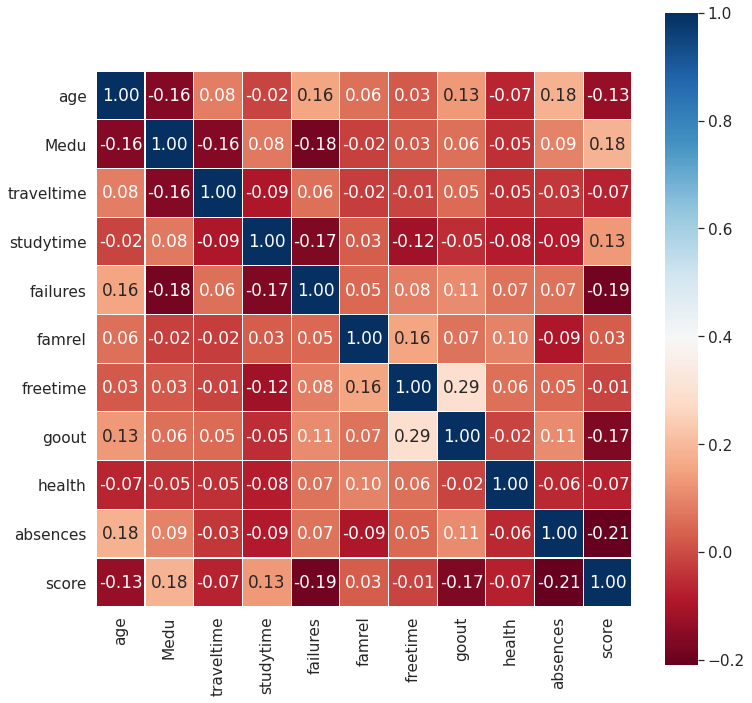

In [1517]:
plot_corr(df, q_flds, figsize=12)

Значимых корелляций между количественными переменными, оставленными в рассмотрение, не видно.

## Пропуски

### Выявление

Выявим количественные переменные, оставленные в рассмотрение, сохранившие пропуски:

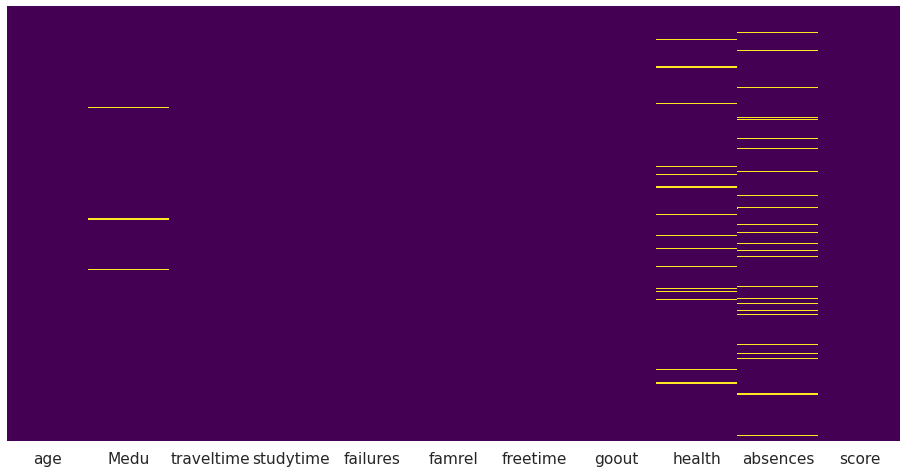

In [1518]:
fig, ax = plt.subplots(figsize=(16,8))
sns_heatmap = sns.heatmap(df[q_flds].isnull(), yticklabels=False, cbar=False, cmap='viridis')

Это `Medu`, `health` и `absences`

Оценим количество пропусков, которые они содержат в совокупности:

In [1519]:
q_df = df[q_flds]
n = q_df[q_df.isna().any(axis=1)].shape[0]
print(f'Пропусков: {round(100 * n / df.shape[0], 1)}% ({n})')

Пропусков: 10.9% (43)


До этого, при предобработке количественных полей, мы приложили максимум усилий для восстановления пропусков. 

Но для полей `Medu`, `health` и `absences` сделать дополнительно уже ничего нельзя. 

Поэтому 11% датасета придется пожертвовать, так как исключать поля `Medu`, `health` и `absences` тоже нельзя. 

Здравый смысл подсказывает, что оценка на госэкзамене может зависеть от них

### Анализ "если бы . . ."

Дополнительно проверим, какое количество пропусков было бы, не занимайся мы восстановлением пропусков.

Для этого возьмем исходный датасет и повторим все шаги предобработки количественных полей, оставленных в рассмотрение, за исключением шагов по восстановлению пропусков:

In [1520]:
c_df = orig_df.copy()
set_val_if(c_df, 'famrel', None, lambda x: x < 1)
set_val_if(c_df, 'absences', None, lambda x: x > treshold)

Выявим количественные переменные, имеющие пропуски:

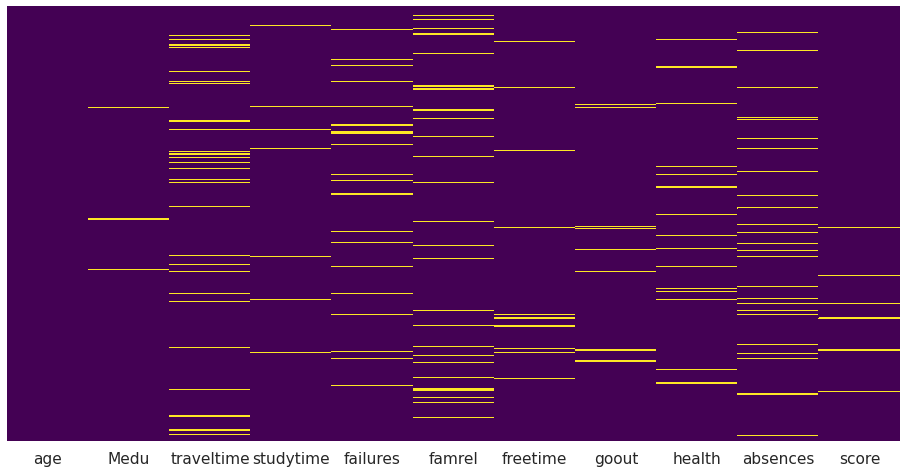

In [1521]:
fig, ax = plt.subplots(figsize=(16,8))
sns_heatmap = sns.heatmap(c_df[q_flds].isnull(), yticklabels=False, cbar=False, cmap='viridis')

Картина ожидаемо хуже - пропусков больше.

Оценим их:

In [1522]:
q_df = c_df[q_flds]
n = q_df[q_df.isna().any(axis=1)].shape[0]
print(f'Пропусков: {round(100 * n / c_df.shape[0], 1)}% ({n})')

Пропусков: 32.4% (128)


Видим, что в таком случае пропусков было бы в 3 раза больше, а пригодных для анализа данных меньше на

In [1523]:
str(round(((100 - 10.9) - (100 - 32.4)) / (100 - 10.9) * 100)) + '%'

'24%'

То есть нам путем восстановления пропусков удалось сохранить четверть данных.

### Удаление

Удалим из датафрейма строки, содержащие пропуски в числовых полях, и запишем новый датафрейм в `q_df`:

In [1524]:
q_df = df.dropna(subset = q_flds)
str(round(100 * (df.shape[0] - q_df.shape[0]) / df.shape[0], 1)) + '%'

'10.9%'

ВАЖНО (это повлияет на результат отбора номинативных переменных)! Дальше мы будем работать с датафреймом `q_df`. Видим, что он похудел по сравнению с исходным на те самые 11%

In [1525]:
df = q_df.copy()

## Анализ номинативных переменных

### Вспомогательные функции

In [1526]:
from itertools import combinations
from scipy.stats import ttest_ind

# поиск статистических различий
def get_stat_dif(df, target, column):
    cols = df.loc[:, column].value_counts().index[:]   
    combinations_all = list(combinations(cols, 2))
    treshold = 0.05/len(combinations_all) # Для учета поправки Бонферрони
    res = 0
    for comb in combinations_all:
        val = ttest_ind(
            df.loc[df.loc[:, column] == comb[0], target], 
            df.loc[df.loc[:, column] == comb[1], target]
        ).pvalue
        rel = treshold / val
        if rel > res:
            res = rel
    if res >= 1:
        print(f'Найдены статистически значимые различия для колонки {column} ({round(res, 1)})')
    else:
        print(f'Cтатистически значимые различия для колонки {column} не найдены ({round(res, 1)})')

### school — аббревиатура школы, в которой учится ученик

Проверим уникальные значения этой переменной:

In [1527]:
df.school.value_counts()

GP    308
MS     44
Name: school, dtype: int64

Все значения являются допустимыми и пропусков нет:

In [1528]:
spaces(df, 'school')

'Пропусков: 0.0% (0)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1529]:
get_stat_dif(df, 'score', 'school')

Cтатистически значимые различия для колонки school не найдены (0.3)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1530]:
remove_fld_from('school', n_flds)

### sex — пол ученика ('F' - женский, 'M' - мужской)

Проверим уникальные значения этой переменной:

In [1531]:
df.sex.value_counts()

F    187
M    165
Name: sex, dtype: int64

Все значения являются допустимыми и пропусков нет:

In [1532]:
spaces(df, 'sex')

'Пропусков: 0.0% (0)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1533]:
get_stat_dif(df, 'score', 'sex')

Найдены статистически значимые различия для колонки sex (1.1)


### address — тип адреса ученика ('U' - городской, 'R' - за городом)

Проверим уникальные значения этой переменной:

In [1534]:
df.address.value_counts()

U    264
R     74
Name: address, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1535]:
spaces(df, 'address')

'Пропусков: 4.0% (14)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1536]:
get_stat_dif(df, 'score', 'address')

Найдены статистически значимые различия для колонки address (4.2)


Пропуски заполним очень популярным значением `U`:

In [1537]:
set_val_if(df, 'address', 'U', lambda x: pd.isna(x))
spaces(df, 'address')

'Пропусков: 0.0% (0)'

### famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Проверим уникальные значения этой переменной:

In [1538]:
df.famsize.value_counts()

GT3    237
LE3     92
Name: famsize, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1539]:
spaces(df, 'famsize')

'Пропусков: 6.5% (23)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1540]:
get_stat_dif(df, 'score', 'famsize')

Cтатистически значимые различия для колонки famsize не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1541]:
remove_fld_from('famsize', n_flds)

### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Проверим уникальные значения этой переменной:

In [1542]:
df.Pstatus.value_counts()

T    286
A     31
Name: Pstatus, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1543]:
spaces(df, 'Pstatus')

'Пропусков: 9.9% (35)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1544]:
get_stat_dif(df, 'score', 'Pstatus')

Cтатистически значимые различия для колонки Pstatus не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1545]:
remove_fld_from('Pstatus', n_flds)

### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Проверим уникальные значения этой переменной:

In [1546]:
df.Mjob.value_counts()

other       118
services     84
at_home      52
teacher      51
health       31
Name: Mjob, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1547]:
spaces(df, 'Mjob')

'Пропусков: 4.5% (16)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1548]:
get_stat_dif(df, 'score', 'Mjob')

Найдены статистически значимые различия для колонки Mjob (1.9)


### Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Проверим уникальные значения этой переменной:

In [1549]:
df.Fjob.value_counts()

other       179
services     85
teacher      25
at_home      15
health       14
Name: Fjob, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1550]:
spaces(df, 'Fjob')

'Пропусков: 9.7% (34)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1551]:
get_stat_dif(df, 'score', 'Fjob')

Cтатистически значимые различия для колонки Fjob не найдены (0.0)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1552]:
remove_fld_from('Fjob', n_flds)

### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Проверим уникальные значения этой переменной:

In [1553]:
df.reason.value_counts()

course        125
reputation     91
home           89
other          30
Name: reason, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1554]:
spaces(df, 'reason')

'Пропусков: 4.8% (17)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1555]:
get_stat_dif(df, 'score', 'reason')

Cтатистически значимые различия для колонки reason не найдены (0.0)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1556]:
remove_fld_from('reason', n_flds)

### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Проверим уникальные значения этой переменной:

In [1557]:
df.guardian.value_counts()

mother    220
father     78
other      25
Name: guardian, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1558]:
spaces(df, 'guardian')

'Пропусков: 8.2% (29)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1559]:
get_stat_dif(df, 'score', 'guardian')

Cтатистически значимые различия для колонки guardian не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1560]:
remove_fld_from('guardian', n_flds)

### schoolsup — дополнительная образовательная поддержка (yes или no)

Проверим уникальные значения этой переменной:

In [1561]:
df.schoolsup.value_counts()

no     297
yes     46
Name: schoolsup, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1562]:
spaces(df, 'schoolsup')

'Пропусков: 2.6% (9)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1563]:
get_stat_dif(df, 'score', 'schoolsup')

Найдены статистически значимые различия для колонки schoolsup (13465.8)


Пропуски заполним очень популярным значением `no`:

In [1564]:
set_val_if(df, 'schoolsup', 'no', lambda x: pd.isna(x))
spaces(df, 'schoolsup')

'Пропусков: 0.0% (0)'

### famsup — семейная образовательная поддержка (yes или no)

Проверим уникальные значения этой переменной:

In [1565]:
df.famsup.value_counts()

yes    196
no     120
Name: famsup, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1566]:
spaces(df, 'famsup')

'Пропусков: 10.2% (36)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1567]:
get_stat_dif(df, 'score', 'famsup')

Cтатистически значимые различия для колонки famsup не найдены (0.1)


В соответствии с этим удивительным (!) заключением (здравый смысл подсказывает, что, наверное, семейная образовательная поддержка может влиять на оценку на госэкзамене как результат образования) убираем переменную из дальнейшего рассмотрения:

In [1568]:
remove_fld_from('famsup', n_flds)

### paid — дополнительные платные занятия по математике (yes или no)

Проверим уникальные значения этой переменной:

In [1569]:
df.paid.value_counts()

no     181
yes    135
Name: paid, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1570]:
spaces(df, 'paid')

'Пропусков: 10.2% (36)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1571]:
get_stat_dif(df, 'score', 'paid')

Cтатистически значимые различия для колонки paid не найдены (0.1)


В соответствии с этим не менее удивительным (!) заключением (здравый смысл подсказывает, что, наверное, дополнительные занятия по математике, пусть и платные, могут влиять на оценку на госэкзамене как результат образования) убираем переменную из дальнейшего рассмотрения:

In [1572]:
remove_fld_from('paid', n_flds)

### activities — дополнительные внеучебные занятия (yes или no)

Проверим уникальные значения этой переменной:

In [1573]:
df.activities.value_counts()

yes    174
no     164
Name: activities, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1574]:
spaces(df, 'activities')

'Пропусков: 4.0% (14)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1575]:
get_stat_dif(df, 'score', 'activities')

Cтатистически значимые различия для колонки activities не найдены (0.2)


В соответствии с этим заключением (удивлятся уже перестаем) убираем переменную из дальнейшего рассмотрения:

In [1576]:
remove_fld_from('activities', n_flds)

### nursery — посещал детский сад (yes или no)

Проверим уникальные значения этой переменной:

In [1577]:
df.nursery.value_counts()

yes    265
no      72
Name: nursery, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1578]:
spaces(df, 'nursery')

'Пропусков: 4.3% (15)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1579]:
get_stat_dif(df, 'score', 'nursery')

Cтатистически значимые различия для колонки nursery не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1580]:
remove_fld_from('nursery', n_flds)

### higher — хочет получить высшее образование (yes или no)

Проверим уникальные значения этой переменной:

In [1581]:
df.higher.value_counts()

yes    321
no      13
Name: higher, dtype: int64

Все значения являются допустимыми. 

Есть некоторое количество пропусков:

In [1582]:
spaces(df, 'higher')

'Пропусков: 5.1% (18)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1583]:
get_stat_dif(df, 'score', 'higher')

Cтатистически значимые различия для колонки higher не найдены (0.2)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1584]:
remove_fld_from('higher', n_flds)

###  internet — наличие интернета дома (yes или no)

Проверим уникальные значения этой переменной:

In [1585]:
df.internet.value_counts()

yes    271
no      51
Name: internet, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1586]:
spaces(df, 'internet')

'Пропусков: 8.5% (30)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1587]:
get_stat_dif(df, 'score', 'internet')

Cтатистически значимые различия для колонки internet не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1588]:
remove_fld_from('internet', n_flds)

### romantic — в романтических отношениях (yes или no)

Проверим уникальные значения этой переменной:

In [1589]:
df.romantic.value_counts()

no     217
yes    109
Name: romantic, dtype: int64

Все значения являются допустимыми. 

Есть заметное количество пропусков:

In [1590]:
spaces(df, 'romantic')

'Пропусков: 7.4% (26)'

Проверим влияние переменной на предсказываемую величину `score`:

In [1591]:
get_stat_dif(df, 'score', 'romantic')

Cтатистически значимые различия для колонки romantic не найдены (0.1)


В соответствии с этим заключением убираем переменную из дальнейшего рассмотрения:

In [1592]:
remove_fld_from('romantic', n_flds)

## Пропуски

### Выявление

Выявим номинативные переменные, оставленные в рассмотрение, сохранившие пропуски:

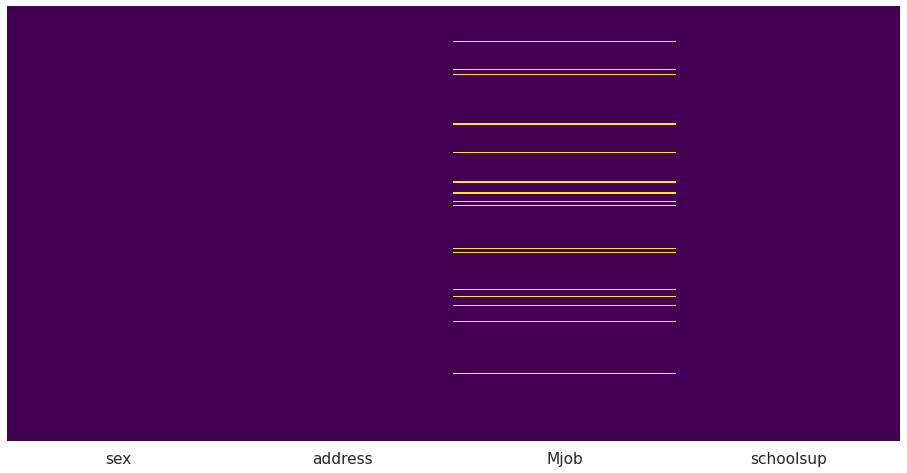

In [1593]:
fig, ax = plt.subplots(figsize=(16,8))
sns_heatmap = sns.heatmap(df[n_flds].isnull(), yticklabels=False, cbar=False, cmap='viridis')

Это `Mjob`. Как мы помним, `Mjob` содержит 4.5% пропусков:

In [1594]:
spaces(df, 'Mjob')

'Пропусков: 4.5% (16)'

До этого, при предобработке номинативных (категориальных) полей, мы приложили максимум усилий для восстановления пропусков. 

Но для поля `Mjob` сделать дополнительно уже ничего нельзя. 

Поэтому:
* либо надо пожертвовать 4.5% оставшегося датасета (`q_df`) и оставить переменную `Mjob` в числе рассматриваемых
* либо исключить переменную `Mjob` из числа рассматриваемых ради сохранения 4.5% оставшегося датасета (`q_df`)

Пойдем пока по первому варианту, но будем держать в голове, что для того, чтобы увеличить датасет, можно отказаться от переменной `Mjob`.

Однако, надо понимать, что в случае отказа от переменной `Mjob` (с коэффициентом статистической значимости 1.9) разумно будет отказаться и от переменной `sex` (с коэффициентом статистической значимости 1.1), оставив только переменые `address` (с коэффициентом статистической значимости 4.2) и `schoolsup` (с коэффициентом статистической значимости 13465.8).

Это разумно будет сделать в том случае, если мы столкнемся с переобучением модели.

### Удаление

Удалим из датафрейма строки, содержащие пропуски в поле `Mjob`, и запишем новый датафрейм в `n_df`:

In [1595]:
n_df = df.dropna(subset = n_flds)
str(round(100 * (df.shape[0] - n_df.shape[0]) / df.shape[0], 1)) + '%'

'4.5%'

Видим, что он похудел по сравнению с `q_df` на те самые 4.5%

## Итог

В результате, для построения модели были отобраны следующие числовые переменные:

In [1596]:
q_flds

['age',
 'Medu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

И следующие номинативные (категориальные) переменные:

In [1597]:
n_flds

['sex', 'address', 'Mjob', 'schoolsup']

Датасет для построения модели (`n_df`) содержит следующее количество строк:

In [1598]:
n_df.shape[0]

336

Что меньше исходного на:

In [1599]:
str(round(100 * (orig_df.shape[0] - n_df.shape[0]) / orig_df.shape[0], 1)) + '%'

'14.9%'

При этом есть возможность сокращения потерь исходных данных до:

In [1600]:
str(round(100 * (orig_df.shape[0] - q_df.shape[0]) / orig_df.shape[0], 1)) + '%'

'10.9%'

за счет удаления из модели номинативных переменных `Mjob` и `sex`

Это уместно будет сделать, если мы столкнемся с переобучением модели

## Подготовка данных для модели

Несмотря на подведенный итог, данные пока нельзя считать подготовленным для создания модели

Необходимо преобразовать значения номинативных (категориальных) переменный в числовой вид

Подготовим данные для обоих вариантов построения модели, упомянутых в разделе "Итог"

Напомним, что варианты отличаются наборами номинативных (категориальных) переменных. Так и будем их различать.

Начнем со второго, как наиболее простого

### Вариант 2 ['address', 'schoolsup']

Во втором варианте достаточно преобразовать номинативные переменные `address` и `schoolsup`

Начнем с создания копии датасета:

In [1601]:
df2 = q_df.copy()

Затем вспомним списки уникальных значений переменных `address` и `schoolsup`:

In [1602]:
(df2.address.value_counts(), df2.schoolsup.value_counts())

(U    264
 R     74
 Name: address, dtype: int64,
 no     297
 yes     46
 Name: schoolsup, dtype: int64)

И та и другая переменные имеют по два разных значения, что хорошо кодируется нулем и единицей:

In [1603]:
df2.address = df2.address.apply(lambda x: 1 if x == 'R' else 0)
df2.schoolsup = df2.schoolsup.apply(lambda x: 1 if x == 'yes' else 0)
(df2.address.value_counts(), df2.schoolsup.value_counts())

(0    278
 1     74
 Name: address, dtype: int64,
 0    306
 1     46
 Name: schoolsup, dtype: int64)

Примечание: таким кодированием мы одновременно преобразовали пропуски в наиболее популярные значения, то есть воспроизвели процедуру, которую мы проводили для другой копии датасета `q_df`, с которой работали во время анализа номинативных переменных

In [1604]:
df2 = df2[q_flds + ['address', 'schoolsup']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         352 non-null    int64  
 1   Medu        352 non-null    float64
 2   traveltime  352 non-null    float64
 3   studytime   352 non-null    float64
 4   failures    352 non-null    float64
 5   famrel      352 non-null    float64
 6   freetime    352 non-null    float64
 7   goout       352 non-null    float64
 8   health      352 non-null    float64
 9   absences    352 non-null    float64
 10  score       352 non-null    float64
 11  address     352 non-null    int64  
 12  schoolsup   352 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 38.5 KB


В результате датасет `df2` содержит целевую переменную `score` и числовые параметры для построения модели, без пропусков.

### Вариант 1 ['sex', 'address', 'Mjob', 'schoolsup']

В первом варианте мы должны преобразовать номинативные переменные `address` и `schoolsup` также как и во втором, но, кроме того, нам необходимо преобразовать переменные `Mjob` и `sex`

Начнем с создания копии датасета (в отличие от второго варианта, здесь за основу мы берем датасет `n_df`, не содержащий пропуски для переменной `Mjob`):

In [1605]:
df1 = n_df.copy()

Преобразуем переменные `address` и `schoolsup` также как и во втором варианте:

In [1606]:
df1.address = df1.address.apply(lambda x: 1 if x == 'R' else 0)
df1.schoolsup = df1.schoolsup.apply(lambda x: 1 if x == 'yes' else 0)
(df1.address.value_counts(), df1.schoolsup.value_counts())

(0    264
 1     72
 Name: address, dtype: int64,
 0    290
 1     46
 Name: schoolsup, dtype: int64)

Вспомним список уникальных значений переменной `sex`:

In [1607]:
df1.sex.value_counts()

F    179
M    157
Name: sex, dtype: int64

Для этой переменной также используем бинарное кодирование:

In [1608]:
df1.sex = df1.sex.apply(lambda x: 1 if x == 'M' else 0)
df1.sex.value_counts()

0    179
1    157
Name: sex, dtype: int64

А вот поскольку список уникальных значений переменной `Mjob` не бинарный:

In [1609]:
df1.Mjob.value_counts()

other       118
services     84
at_home      52
teacher      51
health       31
Name: Mjob, dtype: int64

То для нее придется использовать функцию  get_dummies`:

In [1610]:
df1 = pd.get_dummies(data=df1[q_flds + n_flds], columns=['Mjob'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 394
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            336 non-null    int64  
 1   Medu           336 non-null    float64
 2   traveltime     336 non-null    float64
 3   studytime      336 non-null    float64
 4   failures       336 non-null    float64
 5   famrel         336 non-null    float64
 6   freetime       336 non-null    float64
 7   goout          336 non-null    float64
 8   health         336 non-null    float64
 9   absences       336 non-null    float64
 10  score          336 non-null    float64
 11  sex            336 non-null    int64  
 12  address        336 non-null    int64  
 13  schoolsup      336 non-null    int64  
 14  Mjob_at_home   336 non-null    uint8  
 15  Mjob_health    336 non-null    uint8  
 16  Mjob_other     336 non-null    uint8  
 17  Mjob_services  336 non-null    uint8  
 18  Mjob_teach

В результате датасет `df1` содержит целевую переменную `score` и числовые параметры для построения модели, без пропусков.

## Попытка создать модель на основе подготовленных данных

### Вспомогательная функция

In [1611]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_validate
import numpy as np
def mk_model(df, n_splits=None):
    if n_splits is None:
        n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True)
    y = df.score
    X = df[list(set(df.columns) - set(['score']))]
    scoring=('neg_root_mean_squared_error')
    model = LinearRegression()
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=True)
    return {
        'test_score': -round(np.array(cv_results['test_score']).mean(), 1), 
        'train_score': -round(np.array(cv_results['train_score']).mean(), 1)
    }


### Вариант 1

In [1612]:
mk_model(df1)

{'test_score': 13.6, 'train_score': 12.8}

### Вариант 2

In [1613]:
mk_model(df2)

{'test_score': 13.8, 'train_score': 13.4}

### Вывод

Обе модели сопоставимы по качеству, но вторая проще, а значит менее склонна к переобучению.

Недообучение на второй модели также не наблюдается. 

Поэтому я бы предпочел второй вариант, а значит следующий набор количественных переменных (одинаковый для обоих вариантов):

In [1614]:
q_flds

['age',
 'Medu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

и короткий набор номинативных (категориальных) переменных:  `[ 'address', 'schoolsup' ]`